In [2]:
#Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

zip_path = "C:\\Users\\user\\Downloads\\house-prices-advanced-regression-techniques.zip"
extract_path = "C:\\Users\\user\\Downloads\\house-prices"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

train_path = os.path.join(extract_path, "train.csv")
df = pd.read_csv(train_path)
print(df.head())




   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
# First  few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
503,504,20,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2010,WD,Normal,289000
1134,1135,60,RL,57.0,8773,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,169000
1265,1266,160,FV,35.0,3735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,183900
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.isnull().sum()#missing values


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df.isnull().sum().sort_values(ascending=False)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [11]:
missing = pd.DataFrame({
    "MissingCount": df.isnull().sum(),
    "MissingPercent": df.isnull().mean() * 100
}).sort_values("MissingPercent", ascending=False)

missing


,MissingCount,MissingPercent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


<AxesSubplot: title={'center': 'Missing Values Percentage'}>

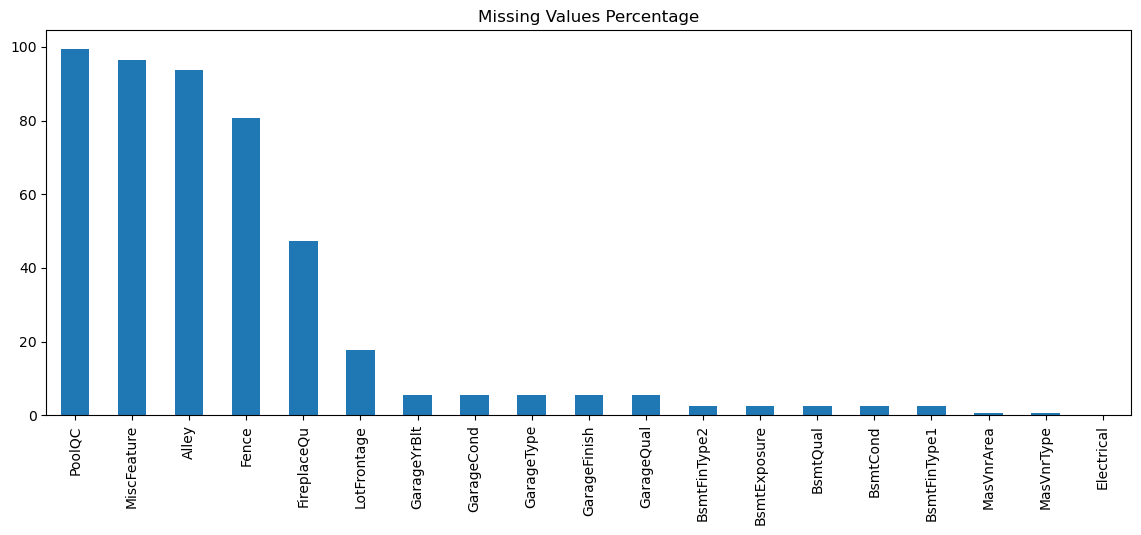

In [12]:
#Visualize missing data
missing[missing["MissingCount"] > 0]["MissingPercent"].plot(
    kind='bar',
    figsize=(14,5),
    title="Missing Values Percentage"
)


In [13]:
#Duplicate values
df.duplicated().sum()



0

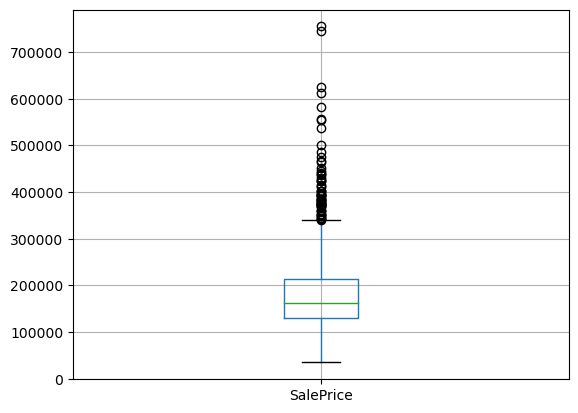

In [14]:
#Outlier Detection
df.boxplot(column='SalePrice')
plt.show()


In [15]:
#Data cleaning
#Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [16]:
#categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("None")


In [17]:
#Feature engineering
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['Remodeled'] = (df['YearRemodAdd'] > df['YearBuilt']).astype(int)
df['TotalBathrooms'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)


In [20]:
#Categorical encoding
df_encoded = pd.get_dummies(df, drop_first=True)


In [19]:
#correlation analysis
df_encoded = pd.get_dummies(df, drop_first=True)



In [21]:
corr_matrix = df_encoded.corr()

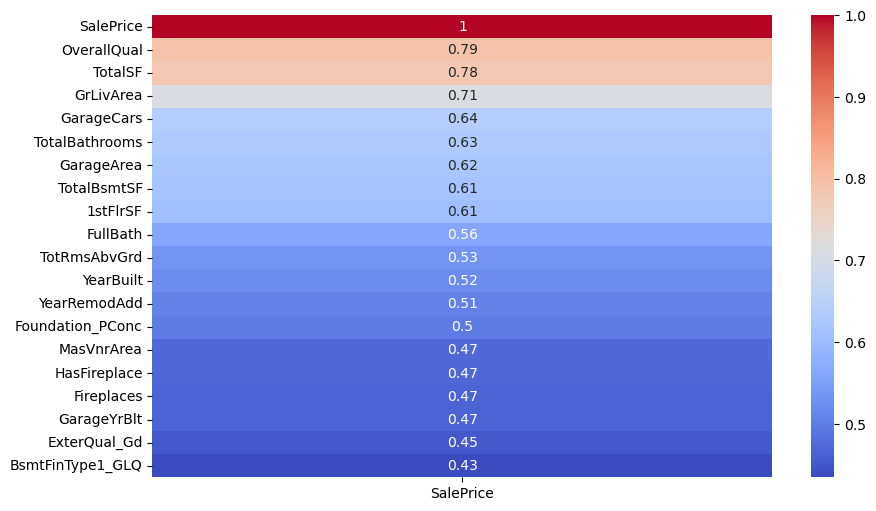

In [22]:
#correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix[['SalePrice']]
    .sort_values(by='SalePrice', ascending=False)
    .head(20),
    annot=True,
    cmap='coolwarm'
)
plt.show()


<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

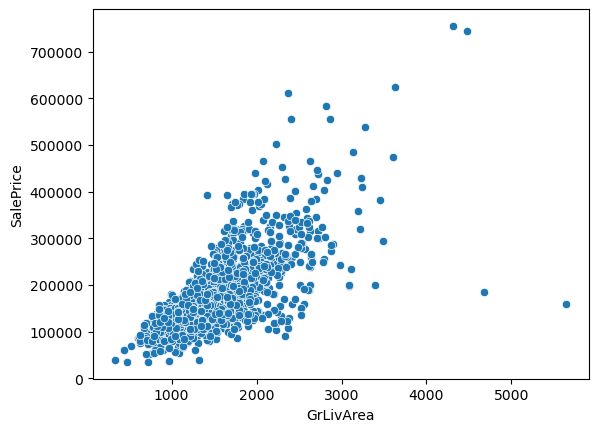

In [24]:
#EDA(Exploratoey data analysis)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)


<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

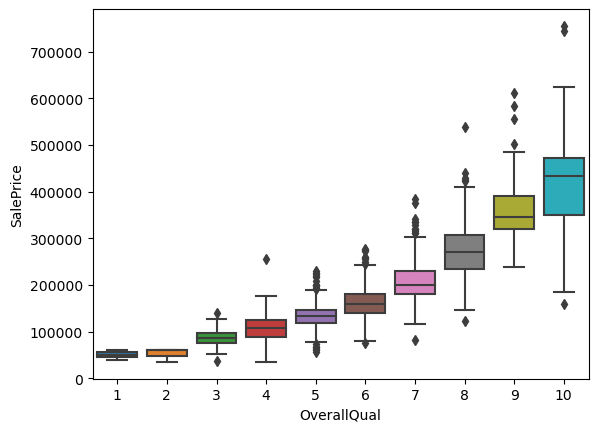

In [25]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)


<AxesSubplot: xlabel='SaleCondition', ylabel='count'>

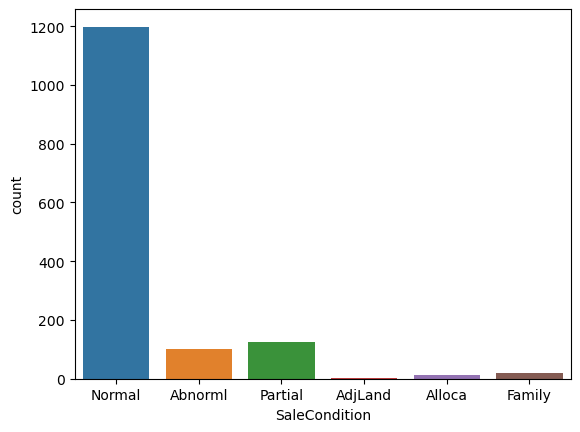

In [26]:
sns.countplot(x='SaleCondition', data=df)


In [27]:
#Min-Max scaling
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

for col in num_cols:
    min_val = df_encoded[col].min()
    max_val = df_encoded[col].max()
    if max_val != min_val:
        df_encoded[col] = (df_encoded[col] - min_val) / (max_val - min_val)



In [28]:

df_encoded[num_cols].describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,TotalBathrooms,TotalSF,TotalPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.500000,0.217043,0.167341,0.043080,0.566591,0.571918,0.719332,0.581096,0.064448,0.078604,...,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938,0.268735,0.242123,0.195573,0.084795
std,0.288972,0.248827,0.075437,0.046653,0.153666,0.139100,0.218862,0.344090,0.112957,0.080811,...,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024,0.222428,0.157080,0.071967,0.102425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.133562,0.029229,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,0.058824,0.200000,0.146742,0.000000
50%,0.500000,0.176471,0.164384,0.038227,0.555556,0.500000,0.731884,0.733333,0.000000,0.067948,...,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.257353,0.200000,0.187423,0.046738
75%,0.750000,0.294118,0.198630,0.048150,0.666667,0.625000,0.927536,0.900000,0.102656,0.126196,...,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.397059,0.300000,0.233841,0.132425
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:

#Train
from numpy.random import permutation

perm = permutation(len(df_encoded))
split = int(0.8 * len(df_encoded))

train_idx, test_idx = perm[:split], perm[split:]

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


In [31]:
#Final data check
df.isnull().sum().sum()



0

In [32]:
df_encoded.shape


(1460, 270)